## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", sep=',')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [3]:
data['status']

0                             no checking account
1                             no checking account
2                                      ... < 0 DM
3                             no checking account
4                             no checking account
                          ...                    
995                           no checking account
996                           no checking account
997    ... >= 200 DM / salary for at least 1 year
998                                    ... < 0 DM
999                           no checking account
Name: status, Length: 1000, dtype: object

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [5]:
for col in data.columns:
    print(f"column name: {col}\n{data[col].value_counts()}\n")
    # print(data[col].unique())

column name: status
... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64

column name: duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: duration, dtype: int64

column name: credit_history
no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64

column name: purpose
furniture/equipment    280
oth

Сначала применим .info() и узнаем есть ли в задаче правильные Nan
затем внимательно посмотрим глазками на данные и убедимся в том, что никаких
пропусков нет (ну типа no, None, -, null)

Разделите признаки на количественные, бинарные, порядковые и категориальные.

__теперь разберемся с признаками:__

* количественный признак: D — множество действительных чисел.

* бинарный признак: D={0,1};

* порядковый признак: D — конечное упорядоченное множество;

* категориальный признак: D — конечное множество;

In [6]:
print(*data.columns, sep='\n')

status
duration
credit_history
purpose
amount
savings
employment_duration
installment_rate
personal_status_sex
other_debtors
present_residence
property
age
other_installment_plans
housing
number_credits
job
people_liable
telephone
foreign_worker
credit_risk


+ __status__ - порядковый признак, показывающий, какое состояние рассчетного счета клиента. (no checking account/.../... < 0 DM)
+ __duration__ - порядковый признак, показывающий, на какой срок (в месяцах был взят кредит). (1/.../184)
+ __credit_history__ - порядковый признак, отражающий кредитную историю клиента. (no credits taken/all credits paid back duly/.../critical account/other credits existing)
+ __purpose__ - порядковый признак, показывающий, с какой целью был взят кредит. (car (new)/car (used)/.../others)
+ __amount__ - количественный признак, показывающий, в каком размере был взят кредит. (1262...7000)
+ __savings__ - порядковый признак, отражающий состояние сберегательного счета или облигаций. (unknown/no savings account/.../... >= 1000 DM)
+ __employment_duration__ - порядковый признак, показывающий стаж работы на последнем рабочем месте. (unemployed/.../... < 1 year)
+ __installment_rate__ - категориальный признак, ставка в процентах от располагаемого дохода.
+ __personal_status_sex__ - категориальный признак, пол и статус отношений. 
+ __other_debtors__ - категориальный признак, отражающий взаимоотношения с другими кредиторами. (none/co-applicant/guarantor)
+ __present_residence__ - порядковый признак, сколько времени живет на текущем месте.
+ __property__ - порядковый признак, показывающий наиболее ценное имущество клиента.
+ __age__ - количественный признак, показывающий возраст клиента. (18...70)
+ __other_installment_plans__ - порядковый признак, показываюший другие планы рассрочки, с уровнями банка, магазинов и без.
+ __housing__ - порядковый признак, показывающий состояние дома клиента.
+ __number_credits__ - порядковый признак, который показывает, сколько еще у человека кредитов в этом банке. (1/2-3/4-5/>= 6)
+ __job__ - категориальный признак, отражающий статус работы клиента.
+ __people_liable__ - бинарный признак, который показывает, сколько человек обеспечивают техническое обслуживание. (0 to 2/3 or more)
+ __telephone__ - бинарный признак, который показывает, привязан ли у пользователя номер к аккаунту. (yes/no)
+ __foreign_worker__ - бинарный признак, который показывает, является ли клиент иностранным работником. (yes/no)
+ __credit_risk__ - целевая переманная, соответственно бинарная. (good/bad)

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
data.groupby("purpose")["amount"].apply(lambda x: x.mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

Если внимательно посмотреть глазками на результат, сможем заметить. Что коллеция между целью и количеством взятых в кредит денег есть очень неплохая. Логично, но все равно стоит явно отметить:

на дорогие вещи(свой бизнес) или вещи, которые в перспективе должны долго прослужить(новая машина), берут больше денег, чем на единоразовые траты(отпуск) или недорогую бытовуху(радио или телевидение)

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [8]:
younger = data[data['age'] < 30]
all_young = younger.shape[0]
rent_young = younger[younger['housing'] == 'rent'].shape[0]
print(f'примерно {round(rent_young/all_young*100, 2)}% клиентов моложе 30 лет снимает жилье')

примерно 66.67% клиентов моложе 30 лет снимает жилье


In [9]:
older = data[data['age'] > 40]
all_old = older.shape[0]
rent_old = older[older['housing'] == 'rent'].shape[0]
print(f'примерно {round(rent_old/all_old*100, 2)}% клиентов старше 40 лет снимает жилье')

примерно 68.01% клиентов старше 40 лет снимает жилье


Вопреки моему изначальному предположению:

Снимает ли клиент квартиру - не зависит от возраста

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
# вычислить количество всех иностранцев лишним не будет,
# иначе как понимать, много ли иностранцев у которых больше 3 кредитов
foreign = data[data["foreign_worker"] == 'yes']
all_foreign = foreign.shape[0]
three_foreign = foreign[(foreign["number_credits"] == '4-5') |
                        (foreign["number_credits"] == '>= 6')].shape[0]
print(f'количество иностранцев с числом кредитов больше 3: {three_foreign}')
print(f'\nпроцент от общего количества {round(three_foreign/all_foreign*100, 2)}%')

количество иностранцев с числом кредитов больше 3: 1

процент от общего количества 2.7%


трудно что-то сказать, даже если очень внимательно посмотреть глазками, но я попробую:

у иностранцев нет тенденции набирать много кредитов (больше трех в данном случае)

### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [12]:
x = np.linspace(-np.pi, np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

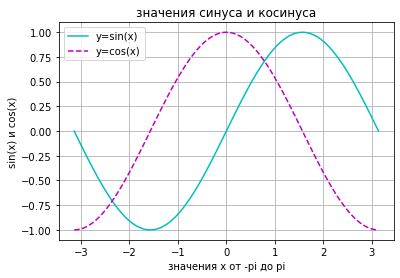

In [13]:
plt.plot(x, y_sin, color='c')
plt.plot(x, y_cos, color='m', linestyle='--')
plt.xlabel('значения x от -pi до pi')
plt.ylabel('sin(x) и cos(x)')
plt.title('значения синуса и косинуса')
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.grid(True)
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [14]:
data['credit_risk'] = data['credit_risk'].map({'good':1, 'bad':0})
good_statuses = data.groupby("status")['credit_risk'].apply(lambda x: x.sum())
data['credit_risk'] = data['credit_risk'].map({0:1, 1:0})
bad_statuses = data.groupby("status")['credit_risk'].apply(lambda x: x.sum())
data['credit_risk'] = data['credit_risk'].map({1:'bad', 0:'good'})

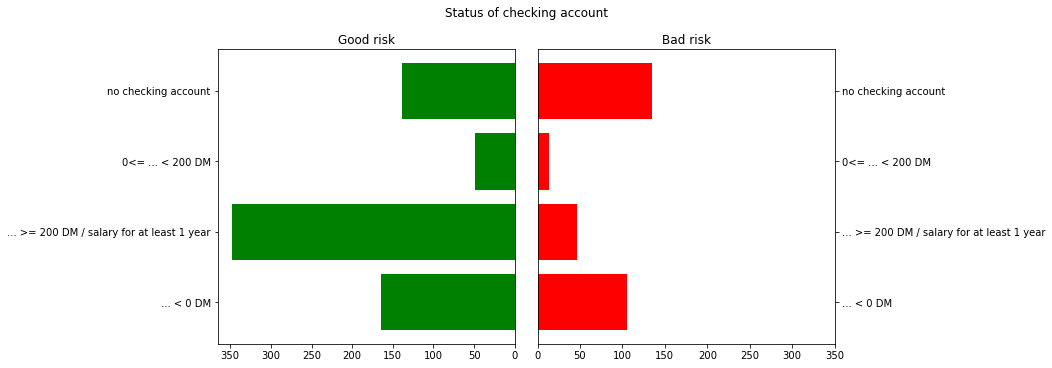

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True)
fig.suptitle('Status of checking account')
fig.set_size_inches(14.5, 5)
ax1.barh(good_statuses.index, good_statuses.values, color='green')
ax1.set_xticks(np.arange(0, 370, step=50))
ax1.invert_xaxis()
ax1.set_title('Good risk')
ax2.barh(bad_statuses.index, bad_statuses.values, color='red')
ax2.set_title('Bad risk')
ax2.yaxis.tick_right()
ax2.set_xticks(np.arange(0, 370, step=50))
plt.show()

методом пристального взгляда:

больше всего людей сконны просрочить кредит, если у них нет расчетного счета или баланс на нем отрицательный. В то же время, люди у которых на расчетном счете больше 200 денег скорее вернут кредит.

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

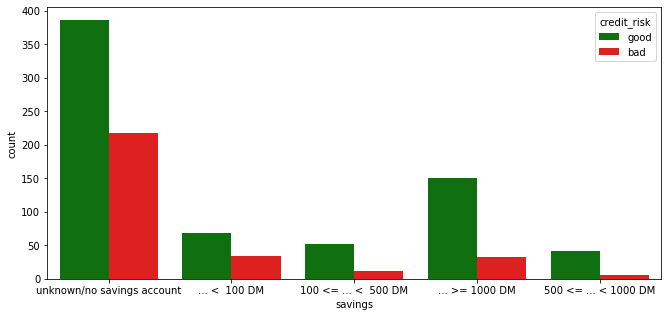

In [17]:
plt.figure(figsize=(11, 5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette=['green', 'red'])
plt.show()

__с точки зрения трудоемкости написания кода__ однозначно побеждает seaborn, я вывел график в одну строку, потратив на это 5 минут времени поиска в гугле. Однако в случае с matplotlib'ом пришлось и с данными поработать и конкретно зависнуть в гугле.

__с точки зреняи восприятия результата__ мне кажется, что seaborn снова победил, на его графике достаточно просто глазками просматривается как сравнение good/bad, да и в целом состояние множества good или bad среди всех категорий.

методом пристального взгляда:

больше всего людей сконны просрочить кредит, если у них нет расчетного счета или баланс на нем отрицательный. В то же время, люди у которых на расчетном счете больше 200 денег скорее вернут кредит.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

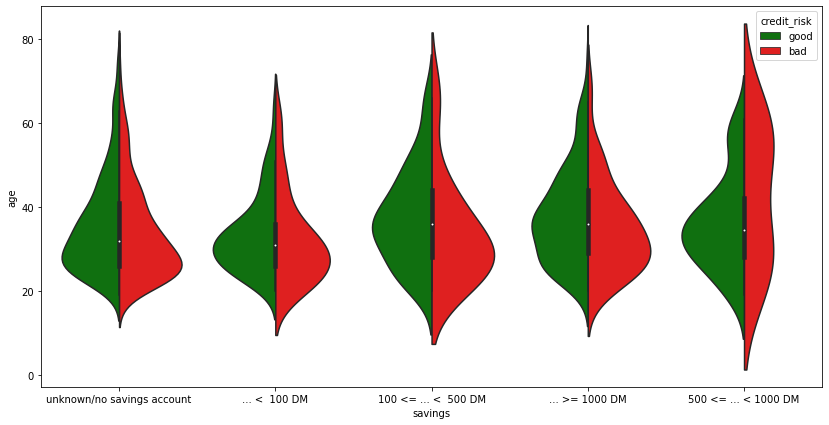

In [18]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=['green', 'red'], split=True)
plt.show()

из графика видно, что распределения по возрасту нормальные. А также заметен небольшой сдвиг в сторону положительности риска у людей, которые старше

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [19]:
good_ages = data[data['credit_risk'] == 'good']['age']
bad_ages = data[data['credit_risk'] == 'bad']['age']
all_ages = data['age']

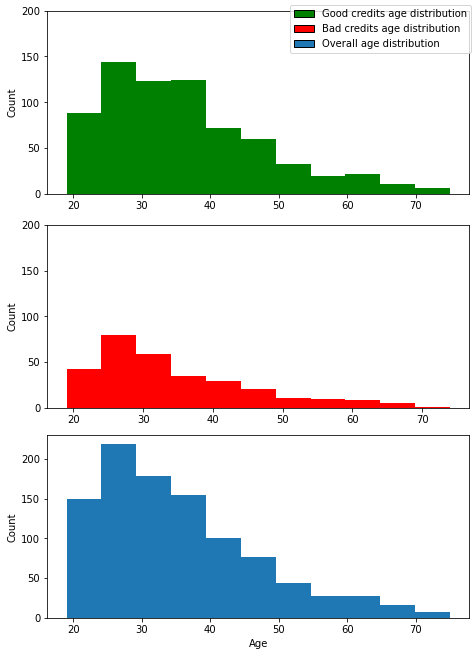

In [20]:
from matplotlib.patches import Rectangle
n_bins = 11

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout = True)
fig.set_size_inches(6.5, 9)
ax1.hist(good_ages, bins=n_bins, color='green')
ax1.set_ylabel('Count')
ax1.set_yticks(np.arange(0, 230, step=50))
ax2.hist(bad_ages, bins=n_bins, color='red')
ax2.set_ylabel('Count')
ax2.set_yticks(np.arange(0, 230, step=50))
ax3.hist(all_ages, bins=n_bins, color='C0')
ax3.set_ylabel('Count')
ax3.set_yticks(np.arange(0, 230, step=50))
ax3.set_xlabel('Age')

colors = ["green", "red", "C0"]
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Good credits age distribution",
          "Bad credits age distribution",
          "Overall age distribution"]
fig.legend(handles, labels)

plt.show()

Распределения нормальные, но в ситуации с положительными кредитами, можно заметить небольшой перекосик в сторону людей, которым от 35 до 40 лет

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

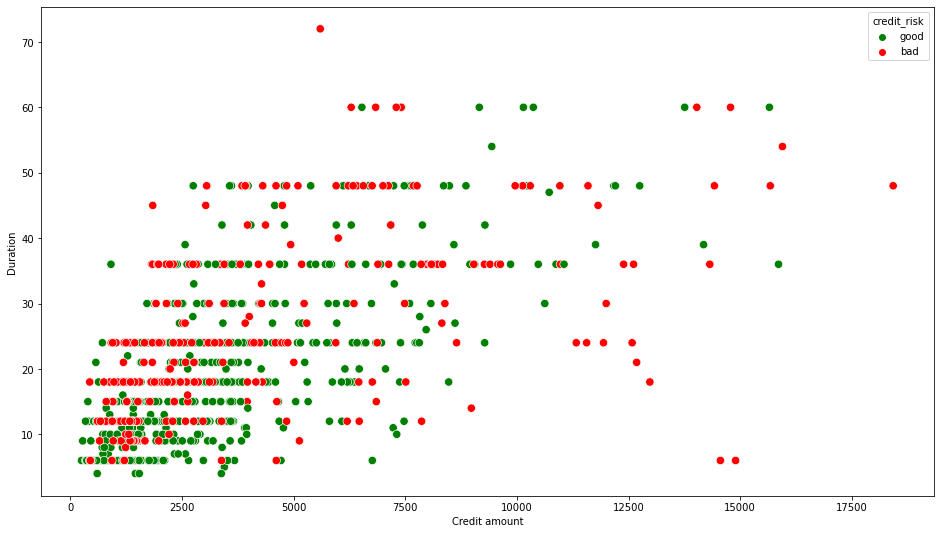

In [21]:
plt.figure(figsize=(16, 9))
ax = sns.scatterplot(data=data,
                     s=70,
                     x="amount",
                     y="duration",
                     hue="credit_risk",
                     palette=['green', 'red'])
ax.set(xlabel='Credit amount', ylabel='Duration')
plt.show()

из диаграммы рессеяния можно заметить, что чем меньше размер кредита, тем больше людей его возвращают

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

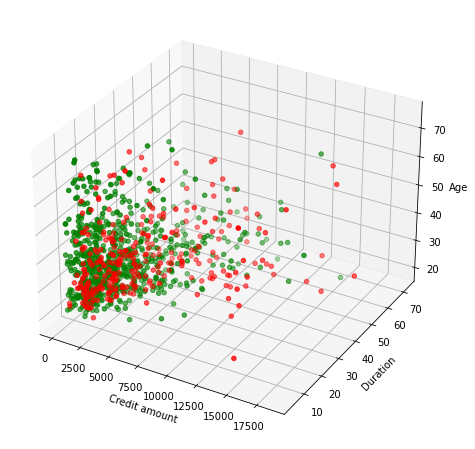

In [22]:
fig = plt.figure(figsize=(17, 8))
ax = fig.add_subplot(111, projection = '3d')
x = data[data["credit_risk"] == 'bad']["amount"]
y = data[data["credit_risk"] == 'bad']["duration"]
z = data[data["credit_risk"] == 'bad']["age"]
ax.scatter(x, y, z, color='red')
x = data[data["credit_risk"] == 'good']["amount"]
y = data[data["credit_risk"] == 'good']["duration"]
z = data[data["credit_risk"] == 'good']["age"]
ax.scatter(x, y, z, color='green')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.show()

заметим, что чем меньше срок кредита и сумма, тем больше вероятность, что его вернут. Также возраст от 35 до 40 является одним из самых надежных наряду с возрастом от 30 до 35

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

+ __status__ - порядковый признак 
+ __duration__ - порядковый признак
+ __credit_history__ - порядковый признак
+ __purpose__ - порядковый признак
+ __amount__ - количественный признак
+ __savings__ - порядковый признак
+ __employment_duration__ - порядковый признак
+ __installment_rate__ - категориальный признак - выброшен
+ __personal_status_sex__ - категориальный признак - выброшен
+ __other_debtors__ - категориальный признак - выброшен
+ __present_residence__ - порядковый признак
+ __property__ - порядковый признак
+ __age__ - количественный признак
+ __other_installment_plans__ - порядковый признак
+ __housing__ - порядковый признак
+ __number_credits__ - порядковый признак
+ __job__ - категориальный признак - выброшен
+ __people_liable__ - бинарный признак
+ __telephone__ - бинарный признак
+ __foreign_worker__ - бинарный признак
+ __credit_risk__ - целевая переманная

In [23]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [24]:
# избавимся от категориальных признаков:
categ = ["installment_rate", "personal_status_sex", "other_debtors", "job"]
for i in categ:
    data = data.drop(i, axis=1)

# заменим на цифирки значения
numeric = ['amount', 'age']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
cols = data.columns
for i in cols:
    if i not in numeric:
        data[i] = label.fit_transform(data[i])

data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,present_residence,property,age,other_installment_plans,housing,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,3,13,0,2,1049,4,2,3,1,21,1,0,0,0,0,0,1
1,3,5,0,5,2799,4,0,0,3,36,1,0,1,1,0,0,1
2,0,8,4,8,841,0,1,3,3,23,1,0,0,0,0,0,1
3,3,8,0,5,2122,4,0,0,3,39,1,0,1,1,0,1,1
4,3,8,0,5,2171,4,0,3,1,38,0,2,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

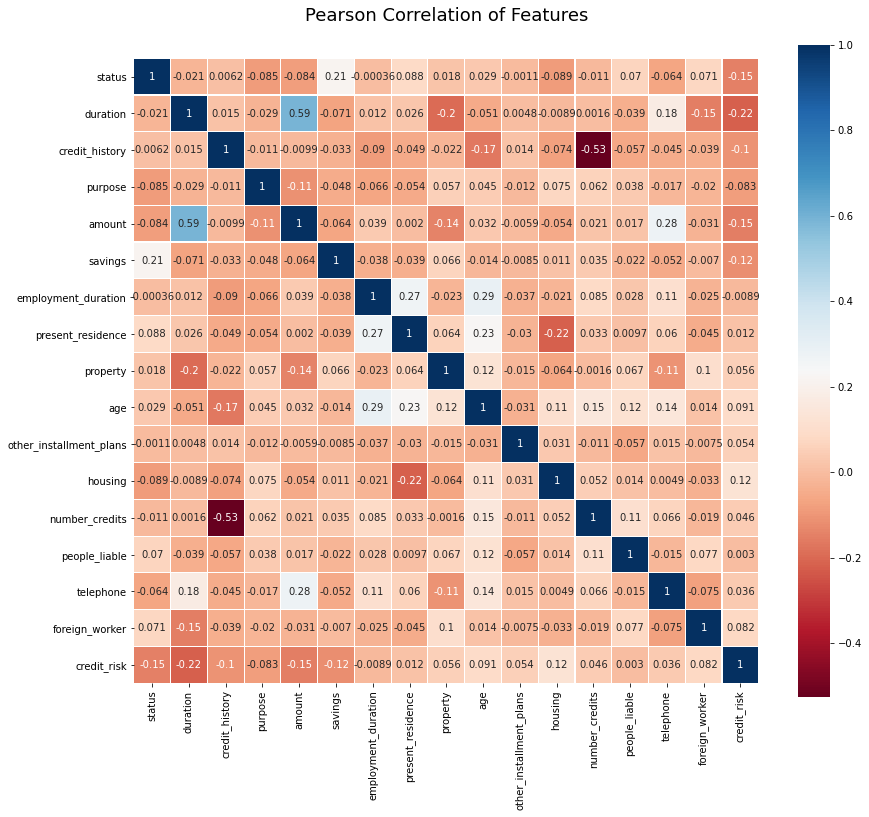

In [25]:
# поглядим на картиночку, чтобы найти закономерности
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

кредит риск неплохо коррелирует с housing (потому что людям есть что терять хе хе) а также немного с индикатором иностранца (убедились сами). также есть обратная корреляция со статусом и длительностью, как было подмечено мной ранее

представим, что мне нужно придумать формулу оценки, прямо как в вышке. А затем я просто ее округлю и все будет хорошо. Если внимательно посмотреть на вклады, очень хочется включить туда: staus, duration, amount и savings (но считать их нужно наоборот --> чем больше тем хуже) есть идейка!
+ давайте прибавлять максимальное значение этого признака и отнимать значение данного


In [26]:
# бинаризируем все
label = LabelEncoder()
data['duration'] = pd.cut(data['duration'].astype(int), 5)
data['duration'] = label.fit_transform(data['duration'])
data['duration'].unique()

array([2, 0, 1, 3, 4])

In [27]:
data['amount'] = pd.cut(data['amount'].astype(int), 5)
data['amount'] = label.fit_transform(data['amount'])
data['amount'].unique()

array([0, 1, 2, 3, 4])

In [28]:
def predict(Xtest: np.array) -> np.array:
    temp = a = np.array([])
    for i in Xtest:
        curr = 0
        curr += 3 - i[0] # разобрались со статусом
        curr += 4 - i[1] # duration max = 4
        curr += 4 - i[4] # amount
        curr += 4 - i[5] # savings
        curr += i[11] # housing max = 2
        curr += i[15] # foreign max = 1
        ans = round(curr / (3+4+4+4+1+1))
        temp = np.append(temp, ans)
    return temp

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

0.72

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int32
 1   duration                 1000 non-null   int32
 2   credit_history           1000 non-null   int32
 3   purpose                  1000 non-null   int32
 4   amount                   1000 non-null   int32
 5   savings                  1000 non-null   int32
 6   employment_duration      1000 non-null   int32
 7   present_residence        1000 non-null   int32
 8   property                 1000 non-null   int32
 9   age                      1000 non-null   int64
 10  other_installment_plans  1000 non-null   int32
 11  housing                  1000 non-null   int32
 12  number_credits           1000 non-null   int32
 13  people_liable            1000 non-null   int32
 14  telephone                1000 non-null   int32
 15  forei

С горем пополам, после огромного количества экспериментов и кривого способа выведения прогноза я пришел к результату 0.72. А теперь хочу попробовать засунуть все это в соседей!

In [31]:
from sklearn.neighbors import KNeighborsClassifier

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.62

вау, я сработал лучше knn. А теперь пожалуй выкину что-то, что недостаточно коррелирует...


In [32]:
categ = ["property", "employment_duration", "present_residence", "people_liable"]
for i in categ:
    data = data.drop(i, axis=1)


X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
    
model = KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.66

ну вот и отлично, даже улучшить удалось.